# Import Core Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [2]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [3]:
%run preprocess_for_SVM.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [4]:
print(X_all.shape, y_all.shape)

(27949, 3) (27949,)


# Group Data by Label and Normalize Data *

In [5]:
print(label_list)

['sit', 'sleep', 'stand', 'walk']


In [6]:
# denoise the signal using wavelet transform
# wavelet_output = wavelet_smooth(X_all)
# X_w = np.array(wavelet_output)

In [7]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [8]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

In [9]:
# plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [10]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27949, 3)


# Apply PCA and LDA

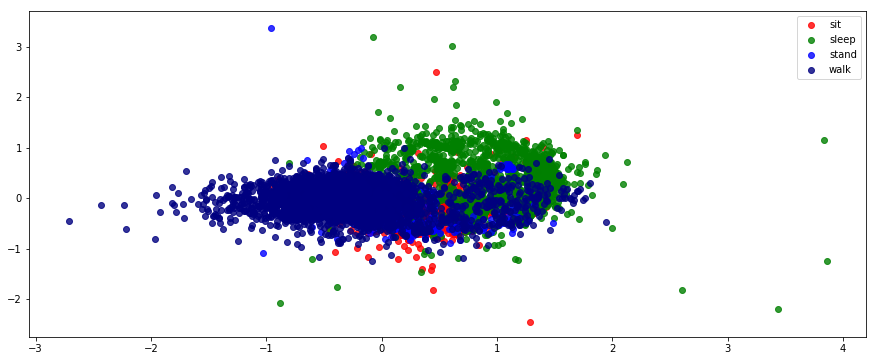

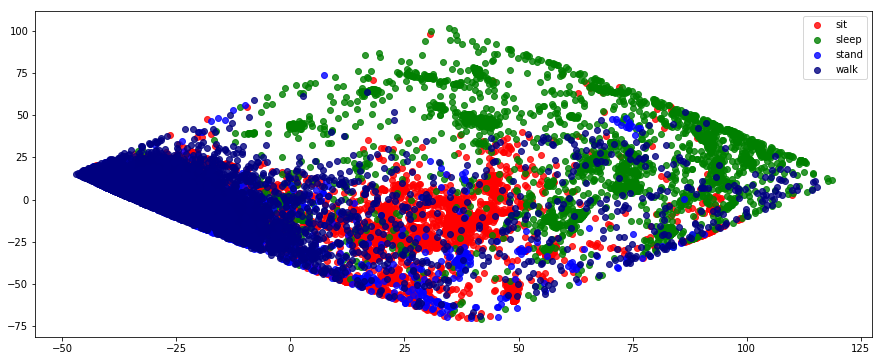

In [11]:
# apply PCA and LDA to X_norm and rpy
X_pca = apply_pca(X_all, y_all, label_list)
rpy_pca = apply_pca(rpy, y_all, label_list)

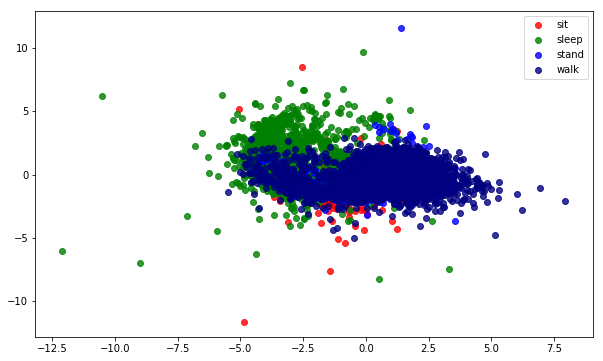

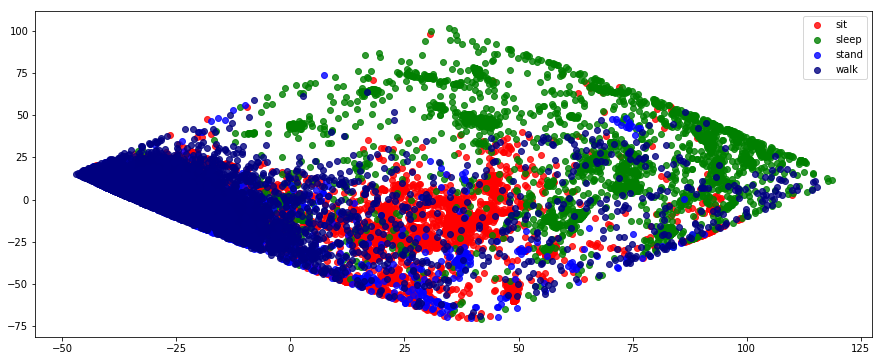

In [12]:
X_lda = apply_lda(X_all, y_all, label_list)
rpy_lda = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [13]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [14]:
print(X_svm.shape, y_svm.shape)

(24645, 180) (24645,)


# Reshape Data (Impure Label)

In [15]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [16]:
print(X_impure.shape, y_impure.shape)

(27890, 180) (27890,)


# Split Train and Test Set

In [17]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.3, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(19523, 180)
(8367, 180)


# SVM

In [18]:
svm_model = svm_classifier(X_train, y_train)
print("Finished training")

Finished training


In [19]:
y_pred_svm = svm_model.predict(X_test)

## SVM Evaluation

In [20]:
%run eval_score.ipynb

In [21]:
LABELS = ['sit','sleep','stand','walk']

0.8685420611306465


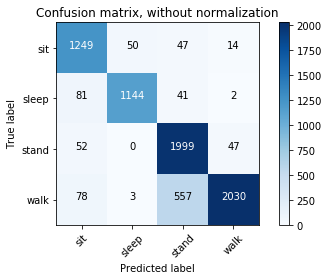

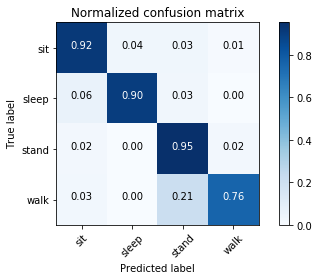

              precision    recall  f1-score   support

         sit       0.86      0.92      0.89      1360
       sleep       0.96      0.90      0.93      1268
       stand       0.76      0.95      0.84      2098
        walk       0.97      0.76      0.85      2668

   micro avg       0.87      0.87      0.87      7394
   macro avg       0.88      0.88      0.88      7394
weighted avg       0.89      0.87      0.87      7394



In [22]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

# K-NN

In [23]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [24]:
y_pred_nn = nn_model.predict(X_test)

## K-NN Evaluation

0.82607519610495


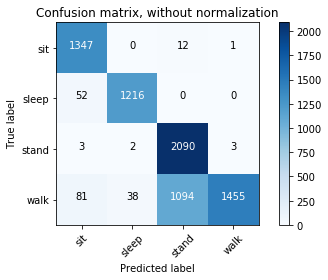

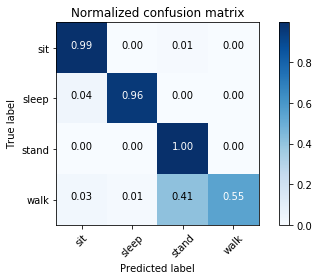

              precision    recall  f1-score   support

         sit       0.91      0.99      0.95      1360
       sleep       0.97      0.96      0.96      1268
       stand       0.65      1.00      0.79      2098
        walk       1.00      0.55      0.71      2668

   micro avg       0.83      0.83      0.83      7394
   macro avg       0.88      0.87      0.85      7394
weighted avg       0.88      0.83      0.82      7394



In [25]:
acc = accuracy_score(y_test, y_pred_nn)
print(acc)

show_conf_matrix(y_test, y_pred_nn, LABELS)
show_clf_report(y_test, y_pred_nn, LABELS)

# Walk Algorithm

In [26]:
%run classifier_alg.ipynb

In [27]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

walk_stairs_exact_p = get_exact_walk_stairs(y_all)
walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
walk_stairs_exact = binarize_walk_prd(walk_stairs_exact_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

NameError: name 'get_exact_walk_stairs' is not defined

## Walk Algorithm Evaluation

In [ ]:
walk_lbl = ['NaN','walk']

In [ ]:
acc = accuracy_score(walk_exact, walk_pred)
print(acc)

show_conf_matrix(walk_stairs_exact, walk_pred, walk_lbl)
show_clf_report(walk_stairs_exact, walk_pred, walk_lbl)

In [ ]:
show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [ ]:
X_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
X_non_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

X_walk = np.array(X_walk)
X_non_walk = np.array(X_non_walk)

y_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
y_non_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

y_walk = np.array(y_walk)
y_non_walk = np.array(y_non_walk)

In [ ]:
print(X_walk.shape, X_non_walk.shape)
print(y_walk.shape, y_non_walk.shape)

In [ ]:
Xw_pca = apply_pca(X_walk, y_walk, label_list)
Xw_lda = apply_lda(X_walk, y_walk, label_list)

In [ ]:
Xnw_pca = apply_pca(X_non_walk, y_non_walk, label_list)
Xnw_lda = apply_lda(X_non_walk, y_non_walk, label_list)

In [ ]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_lda, y_walk, test_size=0.3, random_state=42)

Xnw_train, Xnw_test, ynw_train, ynw_test = train_test_split(Xnw_lda, y_non_walk, test_size=0.3, random_state=42)

In [ ]:
svm_walk = svm_classifier(Xw_train, yw_train)
print("Finish Training")

In [ ]:
svm_non_walk = svm_classifier(Xnw_train, ynw_train)
print("Finish Training")

In [ ]:
yw_pred = svm_walk.predict(Xw_test)
ynw_pred = svm_non_walk.predict(Xnw_test)

In [ ]:
acc = accuracy_score(yw_test, yw_pred)
print(acc)

show_conf_matrix(yw_test, yw_pred, LABELS)
show_clf_report(yw_test, yw_pred, LABELS)

In [ ]:
acc = accuracy_score(ynw_test, ynw_pred)
print(acc)

show_conf_matrix(ynw_test, ynw_pred, LABELS)
show_clf_report(ynw_test, ynw_pred, LABELS)

# Test Model with Some Subject

In [ ]:
test_subj = '1003'
filepath = 'DDC_Data/' + test_subj + '/' + test_subj + '-log_acc.csv'

df_test = pd.read_csv(filepath, header=None, names=['x','y','z','timestamp'])

In [ ]:
ts_list = []
g = 9.8

for i in range(len(df_test)):
    X_i = [df_test.loc[i]['x']/g, df_test.loc[i]['y']/g, df_test.loc[i]['z']/g]
    ts_list.append(df_test.loc[i]['timestamp'])
    
    if(i==0):
        X_visua = X_i
    else:
        X_visua = np.vstack((X_visua, X_i))

ts_list = np.array(ts_list)

In [ ]:
n_comp = 3

pca = PCA(n_components=n_comp)
pca = pca.fit(X_all)
X_vis_pca = pca.transform(X_visua)

In [ ]:
X_vis_imp, ts_list_imp = prepare_impure_label(X_vis_pca, ts_list)

In [ ]:
y_t_pred = svm_model.predict(X_vis_imp)

In [ ]:
y_dict = {}
y_dict['timestamp'] = ts_list_imp
y_dict['y_pred'] = y_t_pred

df_y = pd.DataFrame(y_dict)

df_y['y_pred'].value_counts()

# Test SVM Model with Data from One Subject

In [ ]:
timer_path = 'DDC_Data/' + test_subj + '/' + test_subj + '-iphone-history_amdtimer 6.csv'

cols = ['sid', 'timestamp', 'duration', 'label']
df_timer = pd.read_csv(timer_path, header=None, names=['sid','label','timestamp', 'duration'])
sid_list = np.array(list(df_timer['sid']))

tf = list(map(lambda x: x==int(test_subj), sid_list))
df_sid = df_timer[tf]
df_sid = df_sid.reset_index(drop=True)

# Group a Sequence into Periods by Labels

In [ ]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                 df_y.loc[i-1]['y_pred']])

            period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

# Display Table

In [ ]:
from prettytable import PrettyTable

In [ ]:
labels_list = ['sit', 'sleep', 'stairs', 'stand', 'walk']
headers = ['start', 'end', 'label']

t = PrettyTable(headers)

for row in label_period:
    t.add_row([row[0], row[1], labels_list[row[2]]])

In [ ]:
print(t)

In [ ]:
# df_sid[cols]

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        secs += calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

In [ ]:
print(tb)

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'downstairs', 'upstairs', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'stairs'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])

total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Seconds', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', round(total_dura, 3), np.sum(percent_list)])

In [ ]:
print(tabl)